In [1]:
import os
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model,load_model
import numpy as np
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [3]:
vgg=VGG16()

In [4]:
model_vgg=Model(inputs=vgg.input,outputs=vgg.layers[-2].output)

In [2]:
model=load_model('model_image_captioning_4.h5')

In [5]:
with open('tokenizer_pkl', 'rb') as f:
    t = pickle.load(f)

In [6]:
dict_idxw={}
for key,value in t.word_index.items():
    dict_idxw[value]=key

In [21]:
def generate_caption(img_path):
    img=load_img(img_path,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    img_arr=img_to_array(img)
    img_arr=preprocess_input(img_arr)
    img_arr=img_arr.reshape(-1,224,224,3)
    img_features=model_vgg.predict(img_arr)[0]
    caption='startseq' 
    words=1
    while words<33:
        seq=t.texts_to_sequences([caption])
        seq=pad_sequences(seq,maxlen=33)[0]
        pred_word=dict_idxw[np.argmax(model.predict([[img_features],[seq]])[0])]
        caption+=' '+pred_word
        if pred_word=='endseq':
            break
        words+=1
    caption_words=caption.split()[1:]
    if caption_words[-1]=='endseq':
        caption_words=caption_words[:-1]
    print('Caption generated:', ' '.join(caption_words))

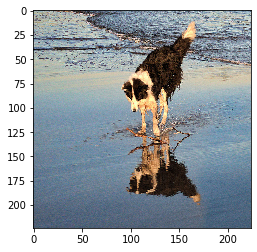

Caption generated: black dog is running through the water


In [22]:
img_path='Examples/example_1.jpg'
generate_caption(img_path)

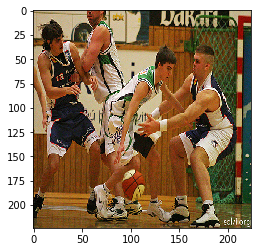

Caption generated: two men are playing soccer


In [23]:
img_path='Examples/example_2.jpg'
generate_caption(img_path)

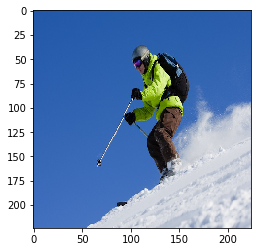

Caption generated: skier is skiing down snowy hill


In [24]:
img_path='Examples/example_3.jpg'
generate_caption(img_path)

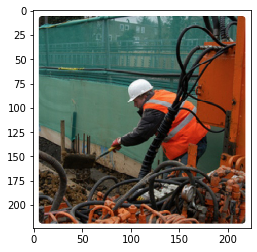

Caption generated: man in red shirt is riding on the beach


In [26]:
img_path='Examples/example_4.jpg'
generate_caption(img_path)

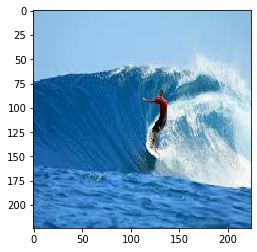

Caption generated: surfer is surfing wave


In [28]:
img_path='Examples/example_5.jpg'
generate_caption(img_path)